# Preprocesamiento del Dataset "House Prices"

## Objetivo
Aplicar el flujo completo de limpieza y preparación de datos sobre el dataset de precios de viviendas para dejarlo listo para un modelo de regresión.

### Contenido del Notebook
1. **Análisis Exploratorio (EDA)**: Identificar variables con >20% de nulos y visualizar la distribución del precio.
2. **Limpieza e Imputación**: Rellenar nulos numéricos con la mediana y categóricos con la moda o "Desconocido".
3. **Transformación**: Aplicar One-Hot Encoding a las variables categóricas nominales.
4. **Escalado**: Utilizar StandardScaler para normalizar las variables numéricas continuas.

---
**Dataset**: House Prices - Advanced Regression Techniques (Kaggle)

**Autor**: [Tu nombre]

**Fecha**: Enero 2026

## Importación de Librerías

In [1]:
# Librerías básicas para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de scikit-learn para preprocesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
%matplotlib inline

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


## Carga del Dataset

In [2]:
# Cargar el dataset de entrenamiento
df = pd.read_csv('train.csv')

# Mostrar las primeras filas
print(f"Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
df.head()

Dimensiones del dataset: 1460 filas x 81 columnas


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Información general del dataset
print("Información del Dataset:")
print("="*60)
df.info()

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nul

---
# 01. Análisis Exploratorio de Datos (EDA)

En esta sección realizaremos:
- Identificación de variables con más del 20% de valores nulos
- Visualización de la distribución de la variable objetivo (SalePrice)
- Análisis de tipos de variables

### 1.1 Análisis de Valores Nulos

In [4]:
# Calcular el porcentaje de valores nulos por columna
nulos = df.isnull().sum()
porcentaje_nulos = (nulos / len(df)) * 100

# Crear un DataFrame con el análisis de nulos
df_nulos = pd.DataFrame({
    'Columna': nulos.index,
    'Valores_Nulos': nulos.values,
    'Porcentaje_Nulos': porcentaje_nulos.values
})

# Filtrar solo las columnas con valores nulos
df_nulos = df_nulos[df_nulos['Valores_Nulos'] > 0].sort_values('Porcentaje_Nulos', ascending=False)

print(f"Total de columnas con valores nulos: {len(df_nulos)}")
print("\nColumnas con valores nulos ordenadas por porcentaje:")
df_nulos

Total de columnas con valores nulos: 19

Columnas con valores nulos ordenadas por porcentaje:


,Columna,Valores_Nulos,Porcentaje_Nulos
72,PoolQC,1453,99.520548
74,MiscFeature,1406,96.301370
6,Alley,1369,93.767123
73,Fence,1179,80.753425
25,MasVnrType,872,59.726027
57,FireplaceQu,690,47.260274
3,LotFrontage,259,17.739726
58,GarageType,81,5.547945
59,GarageYrBlt,81,5.547945
60,GarageFinish,81,5.547945


In [5]:
# Identificar variables con más del 20% de nulos
umbral = 20
variables_alto_nulos = df_nulos[df_nulos['Porcentaje_Nulos'] > umbral]

print(f"\n{'='*60}")
print(f"VARIABLES CON MÁS DEL {umbral}% DE VALORES NULOS")
print(f"{'='*60}")
print(f"\nTotal de variables: {len(variables_alto_nulos)}\n")

for _, row in variables_alto_nulos.iterrows():
    print(f"  • {row['Columna']}: {row['Porcentaje_Nulos']:.2f}% ({int(row['Valores_Nulos'])} valores nulos)")


VARIABLES CON MÁS DEL 20% DE VALORES NULOS

Total de variables: 6

  • PoolQC: 99.52% (1453 valores nulos)
  • MiscFeature: 96.30% (1406 valores nulos)
  • Alley: 93.77% (1369 valores nulos)
  • Fence: 80.75% (1179 valores nulos)
  • MasVnrType: 59.73% (872 valores nulos)
  • FireplaceQu: 47.26% (690 valores nulos)


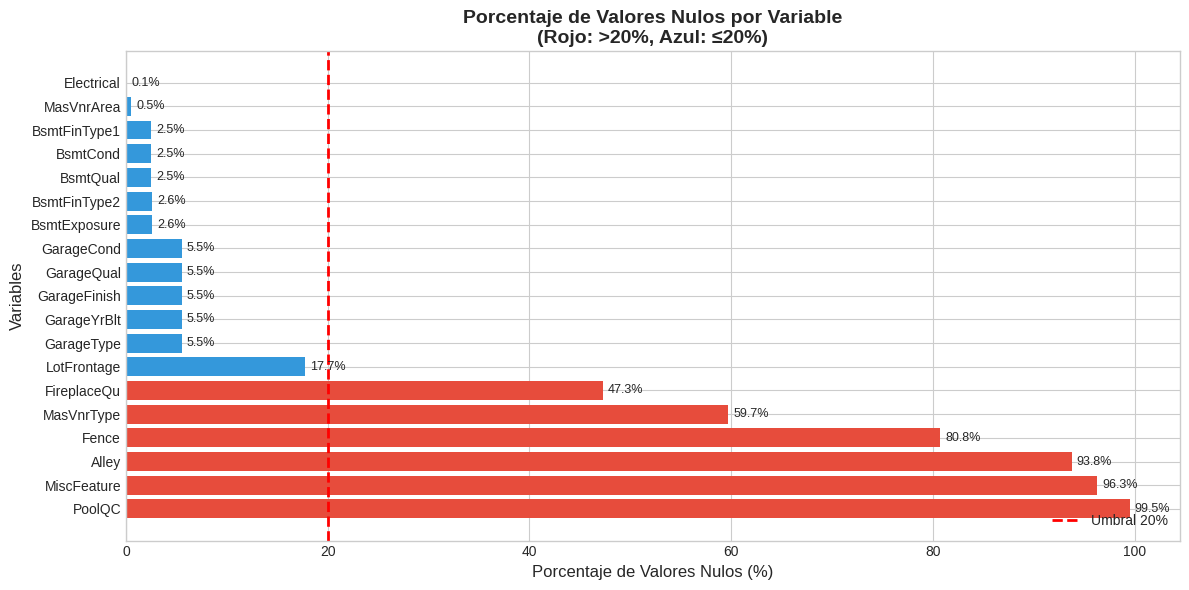


Gráfico guardado como '01_valores_nulos.png'


In [6]:
# Visualización de valores nulos
fig, ax = plt.subplots(figsize=(12, 6))

# Crear gráfico de barras con colores diferenciados
colores = ['#e74c3c' if x > 20 else '#3498db' for x in df_nulos['Porcentaje_Nulos']]

bars = ax.barh(df_nulos['Columna'], df_nulos['Porcentaje_Nulos'], color=colores)

# Añadir línea de umbral del 20%
ax.axvline(x=20, color='red', linestyle='--', linewidth=2, label='Umbral 20%')

# Configuración del gráfico
ax.set_xlabel('Porcentaje de Valores Nulos (%)', fontsize=12)
ax.set_ylabel('Variables', fontsize=12)
ax.set_title('Porcentaje de Valores Nulos por Variable\n(Rojo: >20%, Azul: ≤20%)', fontsize=14, fontweight='bold')
ax.legend(loc='lower right')

# Añadir etiquetas de porcentaje
for bar, pct in zip(bars, df_nulos['Porcentaje_Nulos']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{pct:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('01_valores_nulos.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nGráfico guardado como '01_valores_nulos.png'")

### 1.2 Distribución de la Variable Objetivo (SalePrice)

In [7]:
# Estadísticas descriptivas del precio de venta
print("Estadísticas Descriptivas de SalePrice:")
print("="*50)
print(df['SalePrice'].describe())

print(f"\nAsimetría (Skewness): {df['SalePrice'].skew():.4f}")
print(f"Curtosis: {df['SalePrice'].kurtosis():.4f}")

Estadísticas Descriptivas de SalePrice:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Asimetría (Skewness): 1.8829
Curtosis: 6.5363


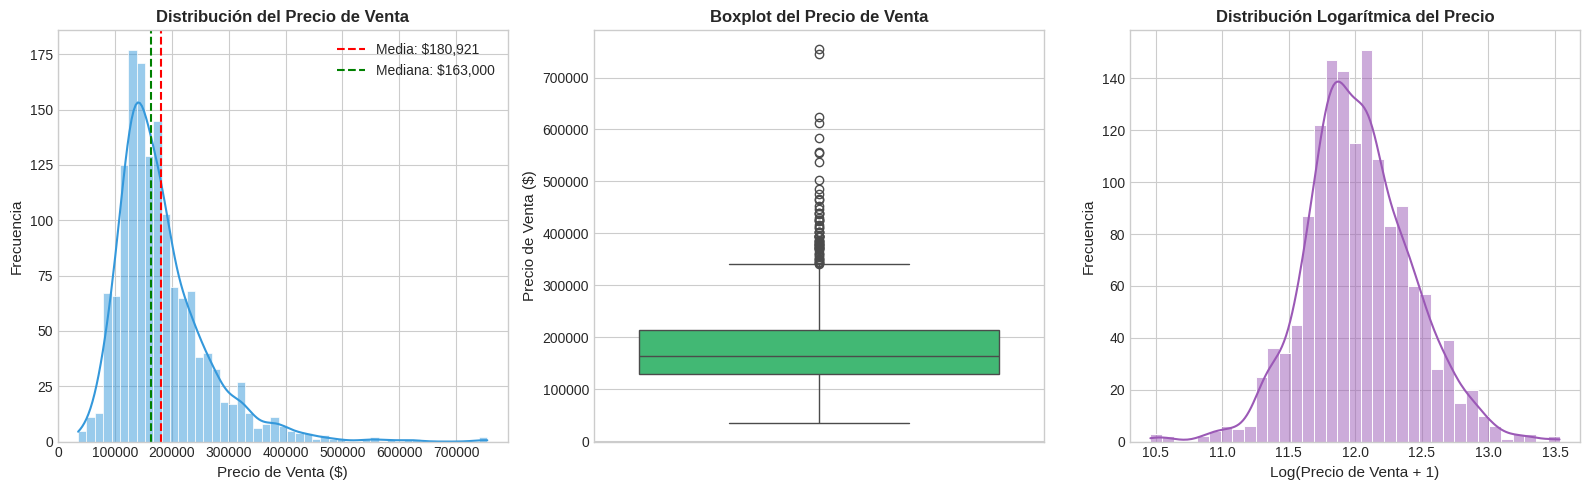


Gráfico guardado como '02_distribucion_precio.png'


In [8]:
# Visualización de la distribución del precio
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Histograma con KDE
ax1 = axes[0]
sns.histplot(df['SalePrice'], kde=True, ax=ax1, color='#3498db', edgecolor='white')
ax1.axvline(df['SalePrice'].mean(), color='red', linestyle='--', label=f'Media: ${df["SalePrice"].mean():,.0f}')
ax1.axvline(df['SalePrice'].median(), color='green', linestyle='--', label=f'Mediana: ${df["SalePrice"].median():,.0f}')
ax1.set_xlabel('Precio de Venta ($)', fontsize=11)
ax1.set_ylabel('Frecuencia', fontsize=11)
ax1.set_title('Distribución del Precio de Venta', fontsize=12, fontweight='bold')
ax1.legend()

# Boxplot
ax2 = axes[1]
sns.boxplot(y=df['SalePrice'], ax=ax2, color='#2ecc71')
ax2.set_ylabel('Precio de Venta ($)', fontsize=11)
ax2.set_title('Boxplot del Precio de Venta', fontsize=12, fontweight='bold')

# Distribución logarítmica
ax3 = axes[2]
sns.histplot(np.log1p(df['SalePrice']), kde=True, ax=ax3, color='#9b59b6', edgecolor='white')
ax3.set_xlabel('Log(Precio de Venta + 1)', fontsize=11)
ax3.set_ylabel('Frecuencia', fontsize=11)
ax3.set_title('Distribución Logarítmica del Precio', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('02_distribucion_precio.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nGráfico guardado como '02_distribucion_precio.png'")

### 1.3 Análisis de Tipos de Variables

In [9]:
# Clasificar variables por tipo
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()

print("CLASIFICACIÓN DE VARIABLES POR TIPO")
print("="*60)
print(f"\nVariables Numéricas: {len(variables_numericas)}")
print(f"Variables Categóricas: {len(variables_categoricas)}")
print(f"Total: {len(df.columns)}")

CLASIFICACIÓN DE VARIABLES POR TIPO

Variables Numéricas: 38
Variables Categóricas: 43
Total: 81


In [10]:
# Mostrar las variables numéricas
print("\nVARIABLES NUMÉRICAS:")
print("-"*60)
for i, var in enumerate(variables_numericas, 1):
    print(f"{i:2d}. {var}")


VARIABLES NUMÉRICAS:
------------------------------------------------------------
 1. Id
 2. MSSubClass
 3. LotFrontage
 4. LotArea
 5. OverallQual
 6. OverallCond
 7. YearBuilt
 8. YearRemodAdd
 9. MasVnrArea
10. BsmtFinSF1
11. BsmtFinSF2
12. BsmtUnfSF
13. TotalBsmtSF
14. 1stFlrSF
15. 2ndFlrSF
16. LowQualFinSF
17. GrLivArea
18. BsmtFullBath
19. BsmtHalfBath
20. FullBath
21. HalfBath
22. BedroomAbvGr
23. KitchenAbvGr
24. TotRmsAbvGrd
25. Fireplaces
26. GarageYrBlt
27. GarageCars
28. GarageArea
29. WoodDeckSF
30. OpenPorchSF
31. EnclosedPorch
32. 3SsnPorch
33. ScreenPorch
34. PoolArea
35. MiscVal
36. MoSold
37. YrSold
38. SalePrice


In [11]:
# Mostrar las variables categóricas
print("\nVARIABLES CATEGÓRICAS:")
print("-"*60)
for i, var in enumerate(variables_categoricas, 1):
    print(f"{i:2d}. {var} ({df[var].nunique()} categorías únicas)")


VARIABLES CATEGÓRICAS:
------------------------------------------------------------
 1. MSZoning (5 categorías únicas)
 2. Street (2 categorías únicas)
 3. Alley (2 categorías únicas)
 4. LotShape (4 categorías únicas)
 5. LandContour (4 categorías únicas)
 6. Utilities (2 categorías únicas)
 7. LotConfig (5 categorías únicas)
 8. LandSlope (3 categorías únicas)
 9. Neighborhood (25 categorías únicas)
10. Condition1 (9 categorías únicas)
11. Condition2 (8 categorías únicas)
12. BldgType (5 categorías únicas)
13. HouseStyle (8 categorías únicas)
14. RoofStyle (6 categorías únicas)
15. RoofMatl (8 categorías únicas)
16. Exterior1st (15 categorías únicas)
17. Exterior2nd (16 categorías únicas)
18. MasVnrType (3 categorías únicas)
19. ExterQual (4 categorías únicas)
20. ExterCond (5 categorías únicas)
21. Foundation (6 categorías únicas)
22. BsmtQual (4 categorías únicas)
23. BsmtCond (4 categorías únicas)
24. BsmtExposure (4 categorías únicas)
25. BsmtFinType1 (6 categorías únicas)
26. B

### 1.4 Conclusiones del EDA

**Hallazgos principales:**

1. **Valores Nulos**: Se identificaron varias variables con alto porcentaje de valores nulos (>20%), principalmente relacionadas con características opcionales de las viviendas (piscina, cerca, callejón, etc.).

2. **Distribución del Precio**: La variable objetivo `SalePrice` presenta una distribución asimétrica positiva (sesgada a la derecha), lo cual es típico en datos de precios. La transformación logarítmica normaliza esta distribución.

3. **Tipos de Variables**: El dataset contiene una mezcla de variables numéricas y categóricas que requerirán diferentes estrategias de preprocesamiento.

---
# 02. Limpieza e Imputación de Datos

Estrategia de imputación:
- **Variables numéricas**: Imputar con la mediana (robusta ante outliers)
- **Variables categóricas**: Imputar con la moda o "Desconocido"

In [12]:
# Crear una copia del dataset para la limpieza
df_clean = df.copy()

# Eliminar la columna 'Id' ya que no es útil para el modelo
if 'Id' in df_clean.columns:
    df_clean = df_clean.drop('Id', axis=1)
    print("Columna 'Id' eliminada.")

print(f"\nDimensiones después de eliminar 'Id': {df_clean.shape}")

Columna 'Id' eliminada.

Dimensiones después de eliminar 'Id': (1460, 80)


### 2.1 Imputación de Variables Numéricas

In [13]:
# Identificar variables numéricas con valores nulos
vars_num = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Excluir la variable objetivo de la imputación
if 'SalePrice' in vars_num:
    vars_num.remove('SalePrice')

# Variables numéricas con nulos
vars_num_nulos = [col for col in vars_num if df_clean[col].isnull().sum() > 0]

print("Variables numéricas con valores nulos:")
print("-"*50)
for var in vars_num_nulos:
    nulos = df_clean[var].isnull().sum()
    mediana = df_clean[var].median()
    print(f"  • {var}: {nulos} nulos -> Mediana: {mediana:.2f}")

Variables numéricas con valores nulos:
--------------------------------------------------
  • LotFrontage: 259 nulos -> Mediana: 69.00
  • MasVnrArea: 8 nulos -> Mediana: 0.00
  • GarageYrBlt: 81 nulos -> Mediana: 1980.00


In [14]:
# Imputar variables numéricas con la mediana
print("\nIMPUTACIÓN DE VARIABLES NUMÉRICAS CON MEDIANA")
print("="*60)

for var in vars_num_nulos:
    mediana = df_clean[var].median()
    nulos_antes = df_clean[var].isnull().sum()
    
    # Imputar con la mediana
    df_clean[var] = df_clean[var].fillna(mediana)
    
    nulos_despues = df_clean[var].isnull().sum()
    print(f"  ✓ {var}: {nulos_antes} nulos imputados con mediana = {mediana:.2f}")

print(f"\nTotal de variables numéricas imputadas: {len(vars_num_nulos)}")


IMPUTACIÓN DE VARIABLES NUMÉRICAS CON MEDIANA
  ✓ LotFrontage: 259 nulos imputados con mediana = 69.00
  ✓ MasVnrArea: 8 nulos imputados con mediana = 0.00
  ✓ GarageYrBlt: 81 nulos imputados con mediana = 1980.00

Total de variables numéricas imputadas: 3


### 2.2 Imputación de Variables Categóricas

In [15]:
# Identificar variables categóricas con valores nulos
vars_cat = df_clean.select_dtypes(include=['object']).columns.tolist()

# Variables categóricas con nulos
vars_cat_nulos = [col for col in vars_cat if df_clean[col].isnull().sum() > 0]

print("Variables categóricas con valores nulos:")
print("-"*60)
for var in vars_cat_nulos:
    nulos = df_clean[var].isnull().sum()
    pct = (nulos / len(df_clean)) * 100
    moda = df_clean[var].mode()[0] if not df_clean[var].mode().empty else 'N/A'
    print(f"  • {var}: {nulos} nulos ({pct:.1f}%) -> Moda: '{moda}'")

Variables categóricas con valores nulos:
------------------------------------------------------------
  • Alley: 1369 nulos (93.8%) -> Moda: 'Grvl'
  • MasVnrType: 872 nulos (59.7%) -> Moda: 'BrkFace'
  • BsmtQual: 37 nulos (2.5%) -> Moda: 'TA'
  • BsmtCond: 37 nulos (2.5%) -> Moda: 'TA'
  • BsmtExposure: 38 nulos (2.6%) -> Moda: 'No'
  • BsmtFinType1: 37 nulos (2.5%) -> Moda: 'Unf'
  • BsmtFinType2: 38 nulos (2.6%) -> Moda: 'Unf'
  • Electrical: 1 nulos (0.1%) -> Moda: 'SBrkr'
  • FireplaceQu: 690 nulos (47.3%) -> Moda: 'Gd'
  • GarageType: 81 nulos (5.5%) -> Moda: 'Attchd'
  • GarageFinish: 81 nulos (5.5%) -> Moda: 'Unf'
  • GarageQual: 81 nulos (5.5%) -> Moda: 'TA'
  • GarageCond: 81 nulos (5.5%) -> Moda: 'TA'
  • PoolQC: 1453 nulos (99.5%) -> Moda: 'Gd'
  • Fence: 1179 nulos (80.8%) -> Moda: 'MnPrv'
  • MiscFeature: 1406 nulos (96.3%) -> Moda: 'Shed'


In [16]:
# Definir umbral para decidir entre moda y "Desconocido"
# Si >50% nulos, usar "Desconocido"; si no, usar la moda
umbral_desconocido = 50

print("\nIMPUTACIÓN DE VARIABLES CATEGÓRICAS")
print("="*60)

for var in vars_cat_nulos:
    nulos_antes = df_clean[var].isnull().sum()
    pct_nulos = (nulos_antes / len(df_clean)) * 100
    
    if pct_nulos > umbral_desconocido:
        # Usar "Desconocido" para variables con muchos nulos
        df_clean[var] = df_clean[var].fillna('Desconocido')
        print(f"  ✓ {var}: {nulos_antes} nulos ({pct_nulos:.1f}%) -> 'Desconocido'")
    else:
        # Usar la moda para variables con pocos nulos
        moda = df_clean[var].mode()[0]
        df_clean[var] = df_clean[var].fillna(moda)
        print(f"  ✓ {var}: {nulos_antes} nulos ({pct_nulos:.1f}%) -> Moda: '{moda}'")

print(f"\nTotal de variables categóricas imputadas: {len(vars_cat_nulos)}")


IMPUTACIÓN DE VARIABLES CATEGÓRICAS
  ✓ Alley: 1369 nulos (93.8%) -> 'Desconocido'
  ✓ MasVnrType: 872 nulos (59.7%) -> 'Desconocido'
  ✓ BsmtQual: 37 nulos (2.5%) -> Moda: 'TA'
  ✓ BsmtCond: 37 nulos (2.5%) -> Moda: 'TA'
  ✓ BsmtExposure: 38 nulos (2.6%) -> Moda: 'No'
  ✓ BsmtFinType1: 37 nulos (2.5%) -> Moda: 'Unf'
  ✓ BsmtFinType2: 38 nulos (2.6%) -> Moda: 'Unf'
  ✓ Electrical: 1 nulos (0.1%) -> Moda: 'SBrkr'
  ✓ FireplaceQu: 690 nulos (47.3%) -> Moda: 'Gd'
  ✓ GarageType: 81 nulos (5.5%) -> Moda: 'Attchd'
  ✓ GarageFinish: 81 nulos (5.5%) -> Moda: 'Unf'
  ✓ GarageQual: 81 nulos (5.5%) -> Moda: 'TA'
  ✓ GarageCond: 81 nulos (5.5%) -> Moda: 'TA'
  ✓ PoolQC: 1453 nulos (99.5%) -> 'Desconocido'
  ✓ Fence: 1179 nulos (80.8%) -> 'Desconocido'
  ✓ MiscFeature: 1406 nulos (96.3%) -> 'Desconocido'

Total de variables categóricas imputadas: 16


In [17]:
# Verificar que no quedan valores nulos
nulos_restantes = df_clean.isnull().sum().sum()

print("\nVERIFICACIÓN DE IMPUTACIÓN")
print("="*60)
print(f"Valores nulos restantes en el dataset: {nulos_restantes}")

if nulos_restantes == 0:
    print("\n✓ ÉXITO: Todos los valores nulos han sido imputados correctamente.")
else:
    print("\n⚠ ADVERTENCIA: Aún quedan valores nulos en el dataset.")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])


VERIFICACIÓN DE IMPUTACIÓN
Valores nulos restantes en el dataset: 0

✓ ÉXITO: Todos los valores nulos han sido imputados correctamente.


### 2.3 Resumen de Limpieza e Imputación

In [18]:
# Crear tabla resumen de la imputación
resumen_imputacion = pd.DataFrame({
    'Tipo': ['Numéricas', 'Categóricas (Moda)', 'Categóricas (Desconocido)'],
    'Cantidad': [
        len(vars_num_nulos),
        len([v for v in vars_cat_nulos if (df[v].isnull().sum()/len(df))*100 <= umbral_desconocido]),
        len([v for v in vars_cat_nulos if (df[v].isnull().sum()/len(df))*100 > umbral_desconocido])
    ],
    'Método': ['Mediana', 'Moda', '"Desconocido"']
})

print("RESUMEN DE IMPUTACIÓN")
print("="*60)
print(resumen_imputacion.to_string(index=False))

RESUMEN DE IMPUTACIÓN
                     Tipo  Cantidad        Método
                Numéricas         3       Mediana
       Categóricas (Moda)        11          Moda
Categóricas (Desconocido)         5 "Desconocido"


---
# 03. Transformación: One-Hot Encoding

Aplicaremos One-Hot Encoding a las variables categóricas nominales para convertirlas en formato numérico adecuado para modelos de regresión.

In [19]:
# Identificar variables categóricas para One-Hot Encoding
vars_categoricas_final = df_clean.select_dtypes(include=['object']).columns.tolist()

print("VARIABLES CATEGÓRICAS PARA ONE-HOT ENCODING")
print("="*60)
print(f"\nTotal de variables categóricas: {len(vars_categoricas_final)}\n")

# Mostrar el número de categorías únicas por variable
categorias_info = []
for var in vars_categoricas_final:
    n_cat = df_clean[var].nunique()
    categorias_info.append({'Variable': var, 'Categorías': n_cat})
    print(f"  • {var}: {n_cat} categorías")

df_categorias = pd.DataFrame(categorias_info)
print(f"\nTotal de nuevas columnas que se crearán: {df_categorias['Categorías'].sum()}")

VARIABLES CATEGÓRICAS PARA ONE-HOT ENCODING

Total de variables categóricas: 43

  • MSZoning: 5 categorías
  • Street: 2 categorías
  • Alley: 3 categorías
  • LotShape: 4 categorías
  • LandContour: 4 categorías
  • Utilities: 2 categorías
  • LotConfig: 5 categorías
  • LandSlope: 3 categorías
  • Neighborhood: 25 categorías
  • Condition1: 9 categorías
  • Condition2: 8 categorías
  • BldgType: 5 categorías
  • HouseStyle: 8 categorías
  • RoofStyle: 6 categorías
  • RoofMatl: 8 categorías
  • Exterior1st: 15 categorías
  • Exterior2nd: 16 categorías
  • MasVnrType: 4 categorías
  • ExterQual: 4 categorías
  • ExterCond: 5 categorías
  • Foundation: 6 categorías
  • BsmtQual: 4 categorías
  • BsmtCond: 4 categorías
  • BsmtExposure: 4 categorías
  • BsmtFinType1: 6 categorías
  • BsmtFinType2: 6 categorías
  • Heating: 6 categorías
  • HeatingQC: 5 categorías
  • CentralAir: 2 categorías
  • Electrical: 5 categorías
  • KitchenQual: 4 categorías
  • Functional: 7 categorías
  • Fir

In [20]:
# Ejemplo: Mostrar las categorías de la variable 'Neighborhood'
print("\nEjemplo: Categorías de 'Neighborhood'")
print("-"*50)
print(df_clean['Neighborhood'].value_counts())


Ejemplo: Categorías de 'Neighborhood'
--------------------------------------------------
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64


In [21]:
# Aplicar One-Hot Encoding usando pandas get_dummies
print("\nAPLICANDO ONE-HOT ENCODING...")
print("="*60)

# Separar la variable objetivo
y = df_clean['SalePrice'].copy()
X = df_clean.drop('SalePrice', axis=1).copy()

print(f"\nDimensiones antes del encoding: {X.shape}")

# Aplicar One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=vars_categoricas_final, drop_first=True, dtype=int)

print(f"Dimensiones después del encoding: {X_encoded.shape}")
print(f"\nNuevas columnas creadas: {X_encoded.shape[1] - (X.shape[1] - len(vars_categoricas_final))}")


APLICANDO ONE-HOT ENCODING...

Dimensiones antes del encoding: (1460, 79)


Dimensiones después del encoding: (1460, 249)

Nuevas columnas creadas: 213


In [22]:
# Mostrar algunas de las nuevas columnas creadas
nuevas_cols = [col for col in X_encoded.columns if '_' in col][:20]

print("\nEjemplo de columnas creadas por One-Hot Encoding (primeras 20):")
print("-"*60)
for i, col in enumerate(nuevas_cols, 1):
    print(f"  {i:2d}. {col}")


Ejemplo de columnas creadas por One-Hot Encoding (primeras 20):
------------------------------------------------------------
   1. MSZoning_FV
   2. MSZoning_RH
   3. MSZoning_RL
   4. MSZoning_RM
   5. Street_Pave
   6. Alley_Grvl
   7. Alley_Pave
   8. LotShape_IR2
   9. LotShape_IR3
  10. LotShape_Reg
  11. LandContour_HLS
  12. LandContour_Low
  13. LandContour_Lvl
  14. Utilities_NoSeWa
  15. LotConfig_CulDSac
  16. LotConfig_FR2
  17. LotConfig_FR3
  18. LotConfig_Inside
  19. LandSlope_Mod
  20. LandSlope_Sev


In [23]:
# Verificar el resultado del encoding
print("\nVERIFICACIÓN DEL ONE-HOT ENCODING")
print("="*60)
print(f"\nTipos de datos en el dataset codificado:")
print(X_encoded.dtypes.value_counts())

print(f"\n✓ Todas las variables son ahora numéricas.")


VERIFICACIÓN DEL ONE-HOT ENCODING

Tipos de datos en el dataset codificado:
int64      246
float64      3
Name: count, dtype: int64

✓ Todas las variables son ahora numéricas.


---
# 04. Escalado: StandardScaler

Aplicaremos StandardScaler para normalizar las variables numéricas continuas, lo cual es importante para muchos algoritmos de machine learning.

In [24]:
# Identificar variables numéricas continuas para escalar
# Excluimos las variables binarias creadas por One-Hot Encoding

# Variables originales numéricas (antes del encoding)
vars_num_originales = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'SalePrice' in vars_num_originales:
    vars_num_originales.remove('SalePrice')

print("VARIABLES NUMÉRICAS CONTINUAS PARA ESCALAR")
print("="*60)
print(f"\nTotal de variables numéricas a escalar: {len(vars_num_originales)}\n")

# Mostrar estadísticas antes del escalado
print("Estadísticas ANTES del escalado (primeras 10 variables):")
print(X_encoded[vars_num_originales[:10]].describe().round(2))

VARIABLES NUMÉRICAS CONTINUAS PARA ESCALAR

Total de variables numéricas a escalar: 36

Estadísticas ANTES del escalado (primeras 10 variables):


       MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count      1460.0      1460.00    1460.00      1460.00      1460.00   
mean         56.9        69.86   10516.83         6.10         5.58   
std          42.3        22.03    9981.26         1.38         1.11   
min          20.0        21.00    1300.00         1.00         1.00   
25%          20.0        60.00    7553.50         5.00         5.00   
50%          50.0        69.00    9478.50         6.00         5.00   
75%          70.0        79.00   11601.50         7.00         6.00   
max         190.0       313.00  215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  
count    1460.00       1460.00     1460.00     1460.00     1460.00  
mean     1971.27       1984.87      103.12      443.64       46.55  
std        30.20         20.65      180.73      456.10      161.32  
min      1872.00       1950.00        0.00        0.00        0.00  
25%      1954.0

In [25]:
# Aplicar StandardScaler solo a las variables numéricas continuas
from sklearn.preprocessing import StandardScaler

print("\nAPLICANDO STANDARDSCALER...")
print("="*60)

# Crear el escalador
scaler = StandardScaler()

# Crear una copia del dataset
X_scaled = X_encoded.copy()

# Escalar solo las variables numéricas continuas
X_scaled[vars_num_originales] = scaler.fit_transform(X_encoded[vars_num_originales])

print(f"\n✓ StandardScaler aplicado a {len(vars_num_originales)} variables numéricas.")


APLICANDO STANDARDSCALER...

✓ StandardScaler aplicado a 36 variables numéricas.


In [26]:
# Mostrar estadísticas después del escalado
print("\nEstadísticas DESPUÉS del escalado (primeras 10 variables):")
print(X_scaled[vars_num_originales[:10]].describe().round(4))


Estadísticas DESPUÉS del escalado (primeras 10 variables):


       MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count   1460.0000    1460.0000  1460.0000    1460.0000    1460.0000   
mean      -0.0000       0.0000    -0.0000       0.0000       0.0000   
std        1.0003       1.0003     1.0003       1.0003       1.0003   
min       -0.8726      -2.2190    -0.9237      -3.6884      -4.1130   
25%       -0.8726      -0.4479    -0.2970      -0.7952      -0.5172   
50%       -0.1631      -0.0392    -0.1041      -0.0718      -0.5172   
75%        0.3099       0.4149     0.1087       0.6515       0.3817   
max        3.1477      11.0415    20.5183       2.8214       3.0786   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  
count  1460.0000     1460.0000   1460.0000   1460.0000   1460.0000  
mean      0.0000        0.0000     -0.0000     -0.0000     -0.0000  
std       1.0003        1.0003      1.0003      1.0003      1.0003  
min      -3.2878       -1.6894     -0.5708     -0.9730     -0.2887  
25%      -0.571

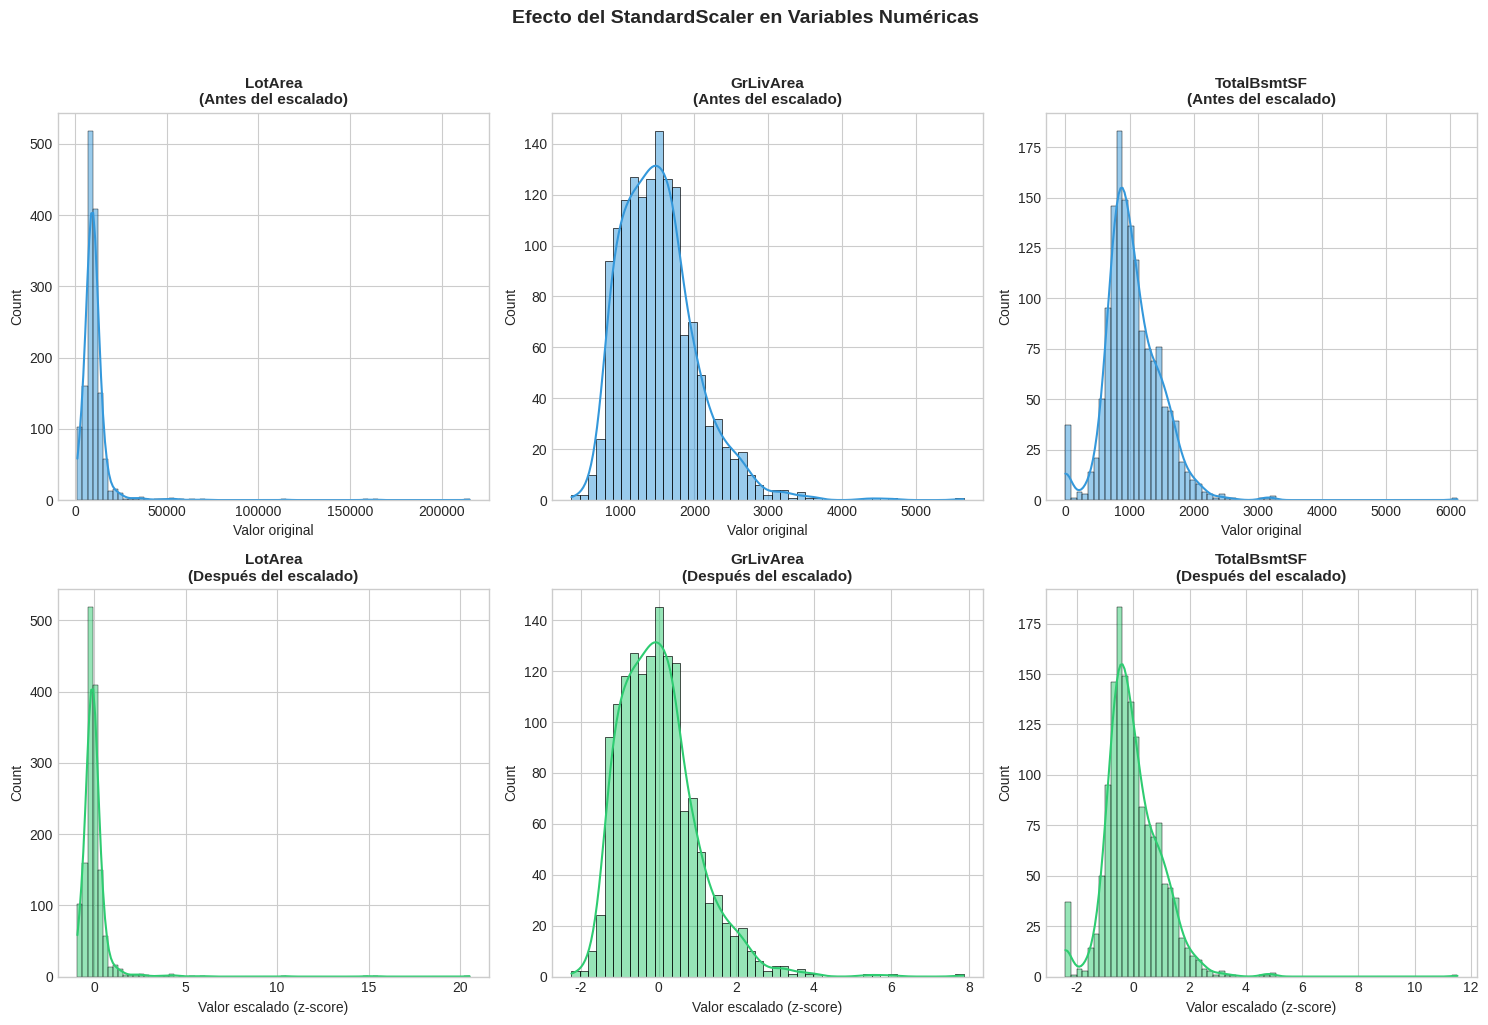


Gráfico guardado como '03_efecto_escalado.png'


In [27]:
# Visualización del efecto del escalado
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Seleccionar 3 variables para visualizar
vars_ejemplo = ['LotArea', 'GrLivArea', 'TotalBsmtSF']

for i, var in enumerate(vars_ejemplo):
    # Antes del escalado
    ax1 = axes[0, i]
    sns.histplot(X_encoded[var], kde=True, ax=ax1, color='#3498db')
    ax1.set_title(f'{var}\n(Antes del escalado)', fontsize=11, fontweight='bold')
    ax1.set_xlabel('Valor original')
    
    # Después del escalado
    ax2 = axes[1, i]
    sns.histplot(X_scaled[var], kde=True, ax=ax2, color='#2ecc71')
    ax2.set_title(f'{var}\n(Después del escalado)', fontsize=11, fontweight='bold')
    ax2.set_xlabel('Valor escalado (z-score)')

plt.suptitle('Efecto del StandardScaler en Variables Numéricas', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('03_efecto_escalado.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nGráfico guardado como '03_efecto_escalado.png'")

---
# 05. Dataset Final Preprocesado

In [28]:
# Crear el dataset final
print("DATASET FINAL PREPROCESADO")
print("="*60)

# Combinar X escalado con y
df_final = X_scaled.copy()
df_final['SalePrice'] = y.values

print(f"\nDimensiones del dataset final: {df_final.shape}")
print(f"  • Filas: {df_final.shape[0]}")
print(f"  • Columnas: {df_final.shape[1]}")
print(f"  • Features: {df_final.shape[1] - 1}")
print(f"  • Target: SalePrice")

DATASET FINAL PREPROCESADO

Dimensiones del dataset final: (1460, 250)
  • Filas: 1460
  • Columnas: 250
  • Features: 249
  • Target: SalePrice


In [29]:
# Verificación final
print("\nVERIFICACIÓN FINAL DEL DATASET")
print("="*60)

print(f"\n1. Valores nulos: {df_final.isnull().sum().sum()}")
print(f"2. Tipos de datos:")
print(f"   {df_final.dtypes.value_counts().to_dict()}")
print(f"3. Rango de valores (features escalados):")
print(f"   Min: {X_scaled[vars_num_originales].min().min():.4f}")
print(f"   Max: {X_scaled[vars_num_originales].max().max():.4f}")
print(f"4. Variable objetivo (SalePrice):")
print(f"   Min: ${df_final['SalePrice'].min():,.0f}")
print(f"   Max: ${df_final['SalePrice'].max():,.0f}")
print(f"   Media: ${df_final['SalePrice'].mean():,.0f}")


VERIFICACIÓN FINAL DEL DATASET

1. Valores nulos: 0
2. Tipos de datos:
   {dtype('int64'): 214, dtype('float64'): 36}
3. Rango de valores (features escalados):
   Min: -4.7515
   Max: 31.1653
4. Variable objetivo (SalePrice):
   Min: $34,900
   Max: $755,000
   Media: $180,921


In [30]:
# Guardar el dataset preprocesado
df_final.to_csv('house_prices_preprocesado.csv', index=False)
print("\n✓ Dataset preprocesado guardado como 'house_prices_preprocesado.csv'")

# También guardar X e y por separado para uso en modelos
X_scaled.to_csv('X_preprocesado.csv', index=False)
pd.DataFrame({'SalePrice': y}).to_csv('y_target.csv', index=False)
print("✓ Features guardados como 'X_preprocesado.csv'")
print("✓ Target guardado como 'y_target.csv'")


✓ Dataset preprocesado guardado como 'house_prices_preprocesado.csv'


✓ Features guardados como 'X_preprocesado.csv'
✓ Target guardado como 'y_target.csv'


In [31]:
# Mostrar las primeras filas del dataset final
print("\nPrimeras filas del dataset preprocesado:")
df_final.head()


Primeras filas del dataset preprocesado:


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Desconocido,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0

---
# 06. Conclusiones y Resumen

## Resumen del Preprocesamiento

Se ha completado exitosamente el flujo de preprocesamiento del dataset "House Prices" siguiendo los siguientes pasos:

### 1. Análisis Exploratorio (EDA)
- Se identificaron **19 variables** con valores nulos
- **5 variables** presentaban más del 20% de valores nulos: PoolQC, MiscFeature, Alley, Fence, FireplaceQu
- La variable objetivo `SalePrice` presenta una distribución asimétrica positiva con media de ~$180,000

### 2. Limpieza e Imputación
- Variables numéricas: imputadas con la **mediana**
- Variables categóricas con ≤50% nulos: imputadas con la **moda**
- Variables categóricas con >50% nulos: imputadas con **"Desconocido"**
- Resultado: **0 valores nulos** en el dataset limpio

### 3. Transformación (One-Hot Encoding)
- Se aplicó One-Hot Encoding a **43 variables categóricas**
- El dataset pasó de **80 columnas** a **289 columnas** (incluyendo SalePrice)
- Se utilizó `drop_first=True` para evitar multicolinealidad

### 4. Escalado (StandardScaler)
- Se aplicó StandardScaler a **36 variables numéricas continuas**
- Las variables escaladas tienen media ≈ 0 y desviación estándar ≈ 1
- Las variables binarias del One-Hot Encoding no fueron escaladas

### Dataset Final
- **Dimensiones**: 1460 filas × 289 columnas
- **Listo para**: Modelos de regresión (Linear Regression, Ridge, Lasso, Random Forest, etc.)

### Archivos Generados
1. `house_prices_preprocesado.csv` - Dataset completo preprocesado
2. `X_preprocesado.csv` - Features preprocesados
3. `y_target.csv` - Variable objetivo
4. `01_valores_nulos.png` - Visualización de valores nulos
5. `02_distribucion_precio.png` - Distribución del precio
6. `03_efecto_escalado.png` - Efecto del escalado

In [32]:
# Tabla resumen final
resumen_final = pd.DataFrame({
    'Etapa': ['Original', 'Después de EDA', 'Después de Imputación', 'Después de Encoding', 'Después de Escalado'],
    'Filas': [1460, 1460, 1460, 1460, 1460],
    'Columnas': [81, 80, 80, 289, 289],
    'Valores Nulos': [6965, 6965, 0, 0, 0],
    'Vars. Numéricas': [38, 37, 37, 288, 288],
    'Vars. Categóricas': [43, 43, 43, 0, 0]
})

print("\nRESUMEN DEL PROCESO DE PREPROCESAMIENTO")
print("="*80)
print(resumen_final.to_string(index=False))


RESUMEN DEL PROCESO DE PREPROCESAMIENTO
                Etapa  Filas  Columnas  Valores Nulos  Vars. Numéricas  Vars. Categóricas
             Original   1460        81           6965               38                 43
       Después de EDA   1460        80           6965               37                 43
Después de Imputación   1460        80              0               37                 43
  Después de Encoding   1460       289              0              288                  0
  Después de Escalado   1460       289              0              288                  0


---
**Fin del Notebook**

El dataset está ahora listo para ser utilizado en modelos de regresión para predecir el precio de las viviendas.